In [2]:
from config import API_KEY
import requests

In [3]:
BASE_URL="https://maps.googleapis.com/maps/api/"
def makeRequest(url):
    url+="&key=%s"%API_KEY
    #print(url)
    return requests.get(url).json()
def getDistanceMatrix(origin,destination,mode="car",departure_time=None,traffic_model ="best_guess"):
    url=BASE_URL+"distancematrix/json?"
    params="origins=%s&destinations=%s&mode=%s&departure_time=%s&traffic_model=%s"%(origin,destination,mode,departure_time,traffic_model)
    return makeRequest(url+params)

In [7]:
import datetime
departure_time=datetime.datetime.now().timestamp()
response=getDistanceMatrix("60607","60527","car",int(departure_time))
response

{'destination_addresses': ['Willowbrook, IL 60527, USA'],
 'origin_addresses': ['Chicago, IL 60607, USA'],
 'rows': [{'elements': [{'distance': {'text': '31.3 km', 'value': 31272},
     'duration': {'text': '38 mins', 'value': 2297},
     'duration_in_traffic': {'text': '53 mins', 'value': 3176},
     'status': 'OK'}]}],
 'status': 'OK'}

TODO add optimistic and pessimistic range. Compute for range until a point. E.g. I need to be home by 6 and want the least time driving

In [136]:
len(range(0,60*14,15))*3

168

In [10]:
from collections import defaultdict
now=departure_time=datetime.datetime.now()
start_date=now
request_times=defaultdict(dict)
for date in (start_date + datetime.timedelta(minutes=offset) for offset in range(0,60*14,15)):
    if date<start_date+datetime.timedelta(hours=5):#replace with UNTIL
        date_str=date.strftime("%b-%d %H:%M")
        request_times['best_guess'][date_str]=(getDistanceMatrix("60606","60527","car",int(date.timestamp()),'best_guess'))
        request_times['pessimistic'][date_str]=(getDistanceMatrix("60606","60527","car",int(date.timestamp()),'pessimistic'))
        request_times['optimistic'][date_str]=(getDistanceMatrix("60606","60527","car",int(date.timestamp()),'optimistic'))

In [11]:
{'destination_addresses': ['Willowbrook, IL 60527, USA'],
               'origin_addresses': ["O'Hare International Airport (ORD), 10000 W O'Hare Ave, Chicago, IL 60666, USA"],
               'rows': [{'elements': [{'distance': {'text': '34.0 km',
                    'value': 34044},
                   'duration': {'text': '25 mins', 'value': 1500},
                   'duration_in_traffic': {'text': '29 mins', 'value': 1748},
                   'status': 'OK'}]}],
               'status': 'OK'}['rows'][0]['elements'][0]['duration_in_traffic']['value']

1748

In [12]:
1748/29

60.275862068965516

In [13]:
request_times_copy=request_times.copy()
for date in request_times_copy:
    for traffic_model in request_times_copy[date]:
        request_times_copy[date][traffic_model]=request_times[date][traffic_model]['rows'][0]['elements'][0]['duration_in_traffic']['value']

In [14]:
import pandas as pd
travel_times=pd.DataFrame(request_times_copy)
travel_times.head()

,best_guess,optimistic,pessimistic
Jun-20 16:14,3574,2746,5064
Jun-20 16:29,3491,2773,4901
Jun-20 16:44,3449,2716,4739
Jun-20 16:59,3354,2636,4226
Jun-20 17:14,3046,2564,3978


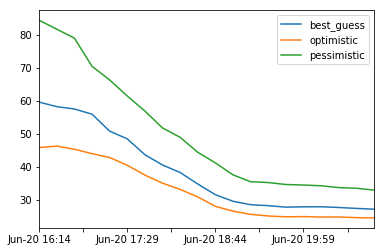

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
(travel_times/60).plot()